TASK 1

In [24]:
import pandas as pd
import glob

DATA_PATH = 'data/DayAheadPrices_12.1.D/*.csv'

files = glob.glob(DATA_PATH)

df_price_all = pd.concat([pd.read_csv(file, sep='\t') for file in files], ignore_index=True)

In [25]:
df_price_all['DateTime'] = pd.to_datetime(df_price_all['DateTime'])

df_price_all = df_price_all.set_index('DateTime')

In [26]:
df_price_all = df_price_all.sort_index()

In [27]:
df_price_all

,ResolutionCode,AreaCode,AreaTypeCode,AreaName,MapCode,Price,Currency,UpdateTime
DateTime,,,,,,,,
2019-01-01 00:00:00,PT60M,10Y1001A1001A45N,BZN,SE2 BZN,SE2,10.07,EUR,2018-12-31 13:16:07
2019-01-01 00:00:00,PT60M,10YNL----------L,BZN,NL BZN,NL,64.98,EUR,2018-12-31 13:16:12
2019-01-01 00:00:00,PT60M,10YHU-MAVIR----U,BZN,HU BZN,HU,52.71,EUR,2018-12-31 11:46:32
2019-01-01 00:00:00,PT60M,10YCH-SWISSGRIDZ,BZN,CH BZN,CH,48.74,EUR,2018-12-31 17:31:50
2019-01-01 00:00:00,PT60M,10YGB----------A,BZN,GB BZN,GB,60.12,GBP,2018-12-31 13:16:27
...,...,...,...,...,...,...,...,...
2023-12-31 23:15:00,PT15M,10YAT-APG------L,BZN,AT BZN,AT,14.08,EUR,2023-12-29 11:23:51.051
2023-12-31 23:30:00,PT15M,10YAT-APG------L,BZN,AT BZN,AT,0.48,EUR,2023-12-29 11:23:51.051
2023-12-31 23:30:00,PT15M,10Y1001A1001A82H,BZN,DE-LU BZN,DE_LU,-9.01,EUR,2024-01-03 11:31:16.016


In [28]:
df_price_NO = df_price_all[df_price_all['AreaCode'].str.contains('NO-2', na=False)]
df_price_DE = df_price_all[df_price_all['MapCode'].str.contains('DE_LU', na=False)]

In [29]:
df_price_DE = df_price_DE[df_price_DE['ResolutionCode'].str.contains('60', na=False)]

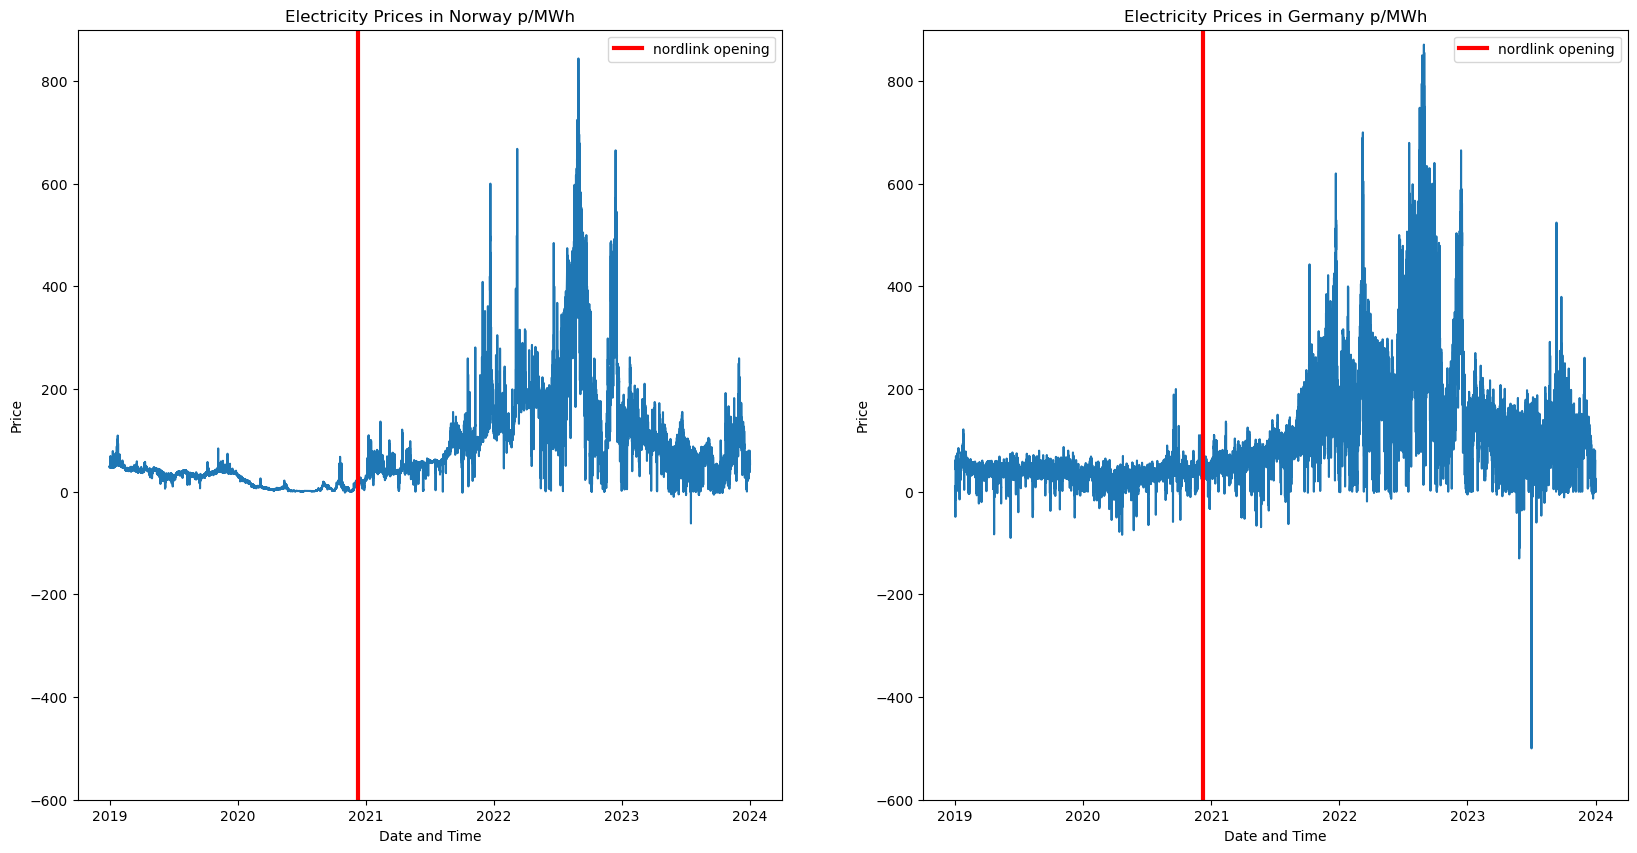

In [48]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1,2, figsize=(20,10))

ax[0].plot( df_price_NO['Price'], linestyle = '-')
ax[0].set_title('Electricity Prices in Norway p/MWh') 
ax[0].set_xlabel('Date and Time') 
ax[0].set_ylabel('Price')

ax[1].plot(df_price_DE['Price'], linestyle = '-')
ax[1].set_title('Electricity Prices in Germany p/MWh') 
ax[1].set_xlabel('Date and Time') 
ax[1].set_ylabel('Price')



ax[0].set_ylim([-600,900])
ax[1].set_ylim([-600,900])

df_price_NO.index = pd.to_datetime(df_price_NO.index)
df_price_DE.index = pd.to_datetime(df_price_DE.index)

nordlink_opening_date = pd.to_datetime('2020-12-09')

ax[0].axvline(nordlink_opening_date, color = 'red',linestyle= '-', linewidth=3, label= 'nordlink opening')
ax[0].legend()

ax[1].axvline(nordlink_opening_date, color = 'red',linestyle= '-', linewidth=3, label= 'nordlink opening')
ax[1].legend()

plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.plot